`ApJdataFrames` 010: Luhman2007
---
`Title`: The Stellar Population of the Chamaeleon I Star-forming Region  
`Authors`: Kevin L Luhman

Data is from this paper:  
http://iopscience.iop.org/0067-0049/173/1/104/fulltext/71585.tables.html

In [1]:
%pylab inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

## Table 6 - Derived Properties for Members of Chamaeleon I

In [3]:
names = ["Name_2MASS","Name_alt","Spectral_Type","T_eff","AJ","L_bol","IMF"]

tbl6 = pd.read_csv("http://iopscience.iop.org/0067-0049/173/1/104/fulltext/71585.tb6.txt", 
                   sep='\t', names=names, na_values='\ldots')
tbl6.head()

,Name_2MASS,Name_alt,Spectral_Type,T_eff,AJ,L_bol,IMF
0,J10463795-7736035,HD 93828,F0,7200,0.00,8.900,NaN
1,J10523694-7440287,NaN,M4.75,3161,0.18,0.100,NaN
2,J10550964-7730540,ESO H\alpha 552,M4.5,3198,0.34,0.083,NaN
3,NaN,T3B,M3.5,3342,0.00,0.040,NaN
4,J10555973-7724399,T3A,M0,3850,0.79,0.420,NaN


In [4]:
upper_limits = (tbl6.T_eff == "\\leq 2400")
measurements = ~upper_limits
print "There are {} upper limits and {} measurements".format(upper_limits.sum(), measurements.sum())

There are 5 upper limits and 210 measurements


In [5]:
sns.set_context("notebook", font_scale=1.5)

(5000, 2000)

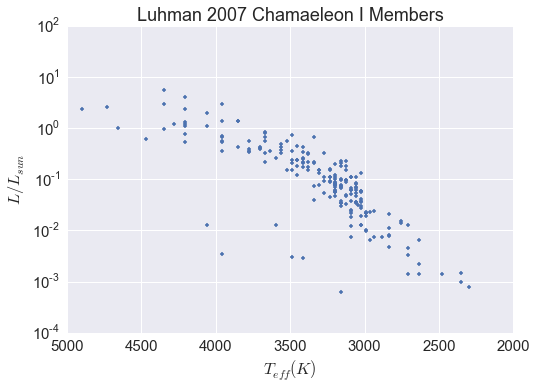

In [6]:
plt.plot(tbl6.T_eff[measurements], tbl6.L_bol[measurements], '.')
#plt.errorbar([2400.0]*upper_limits.sum(), tbl6.L_bol[upper_limits], xerr=0.0001, yerr=None, xlolims=True)

plt.ylabel(r"$L/L_{sun}$")
plt.xlabel(r"$T_{eff} (K)$")
plt.yscale("log")
plt.title("Luhman 2007 Chamaeleon I Members")
plt.xlim(5000,2000)

# Custom analysis

1. Cross-match with Simbad
    - Retrieve UBVRIJHKLM, IRAC, MIPS, IRAS phototometry
    - Retrieve spectral type and spectral type reference.
    - Retrieve coordinates
    - Calculate match difference in coordinates, when possible
2. Convert spectral type to numbers

## Cross-match with Simbad

In [7]:
from astroquery.simbad import Simbad
import astropy.coordinates as coord
import astropy.units as u

In [8]:
customSimbad = Simbad()
customSimbad.add_votable_fields('otype', 'id', 'sptype')

In [9]:
query_list = '2MASS'+tbl6.Name_2MASS.dropna().values
result = customSimbad.query_objects(query_list, verbose=True)

In [11]:
print "There were {} sources queried, and {} sources found.".format(len(query_list), len(result))
if len(query_list) == len(result):
    print "Hooray!  Everything matched"
else:
    print "Which ones were not found?"

There were 204 sources queried, and 204 sources found.
Hooray!  Everything matched


In [12]:
result[0:2]

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,OTYPE,ID,SP_TYPE,SP_QUAL,SP_NATURE,SP_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,,,,
object,string104,string104,int16,int16,float32,float32,int16,string8,string8,object,object,object,object,string8,string8,object
HD 93828,10 46 37.9076,-77 36 03.585,9,9,8.710,7.390,90,A,O,2007A&A...474..653V,Star,,F0V,C,,1975MSS...C01....0H
2MASS J10523694-7440287,10 52 36.943,-74 40 28.78,7,7,70.000,60.000,0,B,I,2003yCat.2246....0C,YSO,,M4.75,D,,2007ApJS..173..104L


# Save data tables locally.

    !mkdir ../data/Luhman2007

In [14]:
tbl6.to_csv("../data/Luhman2007/tbl6.csv", sep="\t")

**The end.**